In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_1 = np.array([[1,1], [1,2], [1,3], [1,4], [1,5], [1,6], [1,7], [1,8], [1,9], [1,10], [1,11], [1,12]])
path_2 = np.array([[1,1], [1,2], [1,3], [1,4], [1,5], [1,6], [1.1,7], [1.2,6], [1.1,5], [1,6], [1,7], [1,8], [1,9], [1,10], [1,11], [1,12]])
path_3 = np.append(np.arange(50).reshape(50,1), np.zeros(50).reshape(50,1), axis=1)
path_3[:,0] /= 4
path_3[:,1] = np.sin(path_3[:,0])

In [4]:
def compute_distance_matrix(path):
   return np.linalg.norm(path[:,:,np.newaxis] - path[:,:,np.newaxis].T, axis=1)

def compute_pairwise_distances(path):
   return np.linalg.norm(path[1:]-path[:-1], axis=1)

def interpolate(a, b, pct):
   return ((b-a)*pct + a).reshape(1,2)

def sample_along_polyline(path, n_points):
   pdist = compute_pairwise_distances(path)
   sample_dist = np.sum(pdist)/(n_points-1)
   mod = 0
   points = path[0].reshape(1, 2)
   path = np.delete(path, 0, axis=0)
   while path.shape[0]>0:
      points = np.append(points, interpolate(points[-1], path[0], (sample_dist-mod)/pdist[0]), axis=0)
      pdist[0] -= (sample_dist-mod)
      if pdist[0]/sample_dist < 1:
         # handle numerical errors at end of path
         if path.shape[0] == 1 and not np.array_equal(points[-1],path[0]):
            points = np.append(points, path[0].reshape(1,2), axis=0)
         mod = pdist[0]
         pdist = np.delete(pdist, 0, axis=0)
         path = np.delete(path, 0, axis=0)
      else:
         mod = 0
   return points


(-5.0, 5.0)

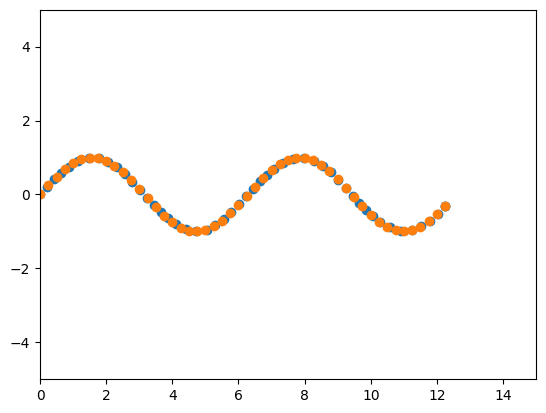

In [79]:
x = sample_along_polyline(path_3, 50)
plt.scatter(x[:,0], x[:,1])
plt.scatter(path_3[:,0], path_3[:,1])
plt.xlim((0, 15))
plt.ylim((-5, 5))

In [5]:
def dist(a, b):
   return np.sqrt(np.sum(np.power(a-b, 2)))

def compute_path_distance (path_1, path_2):
   path_dists = -1 * np.ones((path_1.shape[0],path_2.shape[0]))

   def path_distance(path_1, path_2):
      if path_dists[path_1.shape[0]-1, path_2.shape[0]-1] != -1:
         return path_dists[path_1.shape[0]-1, path_2.shape[0]-1]
      if path_1.shape[0] == 1 and path_2.shape[0] == 1:
         path_dists[0,0] = dist(path_1[0], path_2[0])
      elif path_1.shape[0] == 1:
         path_dists[0, path_2.shape[0]-1] = path_distance(path_1, path_2[:-1])
      elif path_2.shape[0] == 1:
         path_dists[path_1.shape[0]-1] = path_distance(path_1[:-1], path_2)
      else:
         path_dists[path_1.shape[0]-1, path_2.shape[0]-1] = min(path_distance(path_1[:-1], path_2), path_distance(path_1, path_2[:-1]), path_distance(path_1[:-1], path_2[:-1])) + dist(path_1[-1], path_2[-1])
      return path_dists[path_1.shape[0]-1, path_2.shape[0]-1]

   return path_distance(path_1, path_2)

In [7]:
x = sample_along_polyline(path_3, 50)
y = sample_along_polyline(path_2, 50)
print(compute_path_distance(x, y))
print(compute_path_distance(y, x))

427.72293312256346
427.72293312256346
